In [2]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
# Display the first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
fare = data['Fare'].copy()

In [4]:
# Basic statistics for the 'Fare' column
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [5]:
data['Fare'].value_counts(ascending=True)

Fare
10.5167     1
22.0250     1
15.0500     1
59.4000     1
28.7125     1
           ..
26.0000    31
7.7500     34
7.8958     38
13.0000    42
8.0500     43
Name: count, Length: 248, dtype: int64

In [18]:
# It is better to remove the 'Fare' column with value 0, as it may not be useful for analysis
fare_zero = data[data['Fare'] == 0]
fare_zero

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
# find mean of Fare in data based on the 'Pclass' column
fare_mean_by_pclass = data.groupby('Pclass')['Fare'].mean()
fare_mean_by_pclass

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [17]:
# replace values of Fare = 0 with the mean of Fare based on the 'Pclass' column
data['Fare'] = data.apply(lambda row: fare_mean_by_pclass[row['Pclass']] if row['Fare'] == 0 else row['Fare'], axis=1)


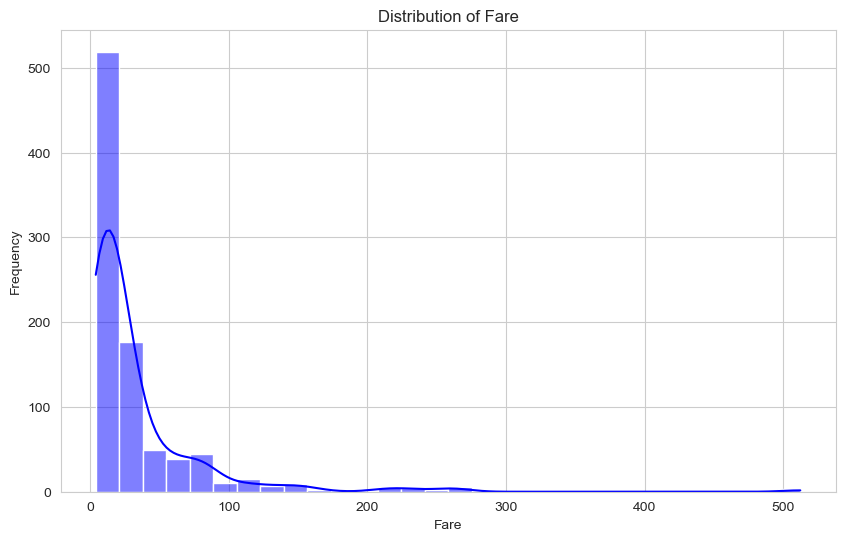

In [19]:
# Distribution plot for 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

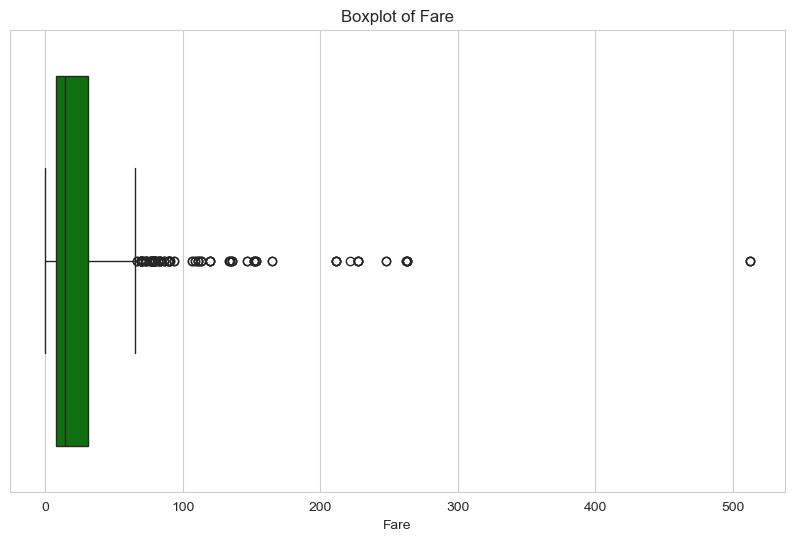

In [9]:
# Boxplot for 'Fare'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Fare'], color='green')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

In [10]:
data[data['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


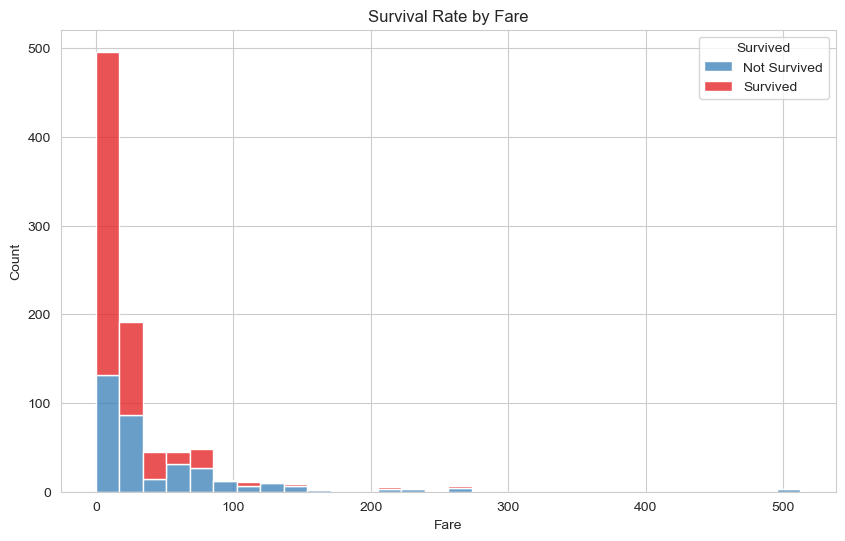

In [11]:
# plot rate of Survival by Fare by binning Fare into 10 bins
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', hue='Survived', multiple='stack', bins=30, palette='Set1')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

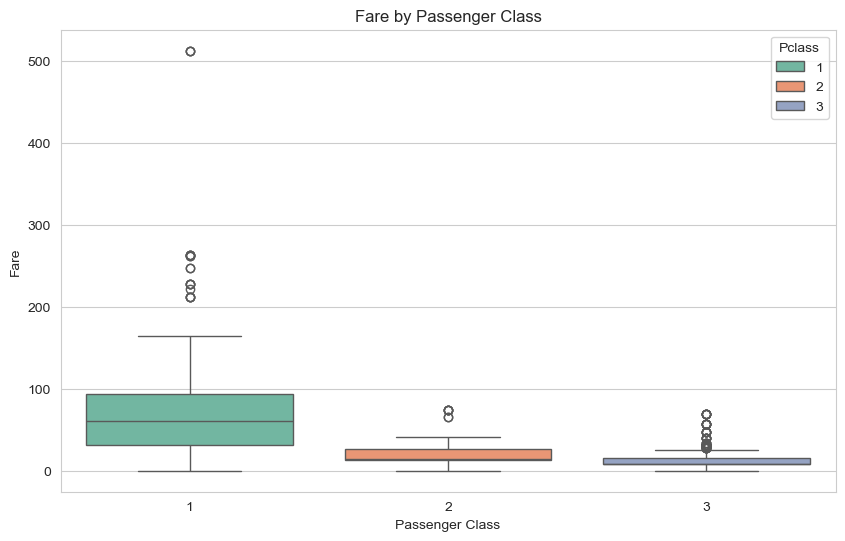

In [12]:
# Analyze 'Fare' by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Pclass'], y=data['Fare'],hue= data['Pclass'], palette='Set2')
plt.title('Boxplot of Pclass')
plt.xlabel('Pclass')
plt.title('Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

In [13]:
test['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64